# Exercise 8: Put all the concepts in Exercise 7 together

Skills:
* Apply all the concepts covered in Exercise 7 for a research question. Know when to use what concept.

References: 
* Exercise 7


### To Do

Narrow down the list of rail routes in CA to 3 groups. Use the SHN network to determine how much of the rail route runs near the SHN. We care only about rail routes that run entirely in CA (use stops to figure this out).

**Near** the interstate, US highway, or state highway is defined by being within a quarter mile. For this exercise, the distinction between interstate, US highway, and state highway is not important; treat any road that shows up in the dataset as "the SHN".

There are theoretically 3 groupings: 
* rail routes that are never within 0.25 miles of the SHN
* rail routes with > 0 but less than half of its length near the SHN 
* rail routes with at least half of its length near the SHN

Provide a table and a chart showing how many rail routes fall into each of the 3 groups by district.

Use a Markdown cell at the end to connect which geospatial concept was applied to which step of the process. The concepts that should be used are `projecting CRS`, `buffering`, `dissolve`, `clipping`, `spatial join`, `overlay`. 

In [1]:
import geopandas as gpd
import intake
import pandas as pd

catalog = intake.open_catalog(
    "../_shared_utils/shared_utils/shared_data_catalog.yml")

## Importing Data

### Caltrans Districts

In [2]:
districts = catalog.caltrans_districts.read()
districts.head(2)

,OBJECTID,DISTRICT,Region,Shape__Area,Shape__Length,geometry
0,1,1,North,4.659910e+10,1.644579e+06,"POLYGON ((-123.51781 42.00076, -123.51793 42.0..."
1,2,2,North,1.266950e+11,1.775639e+06,"POLYGON ((-122.30409 42.00835, -122.34369 42.0..."


 ### Highways

In [3]:
highways = catalog.state_highway_network.read()
highways.head(2)

,Route,County,District,RouteType,Direction,geometry
0,1,LA,7,State,NB,"MULTILINESTRING ((-118.14322 33.79010, -118.14..."
1,1,LA,7,State,SB,"MULTILINESTRING ((-118.39630 33.94454, -118.39..."


<AxesSubplot:>

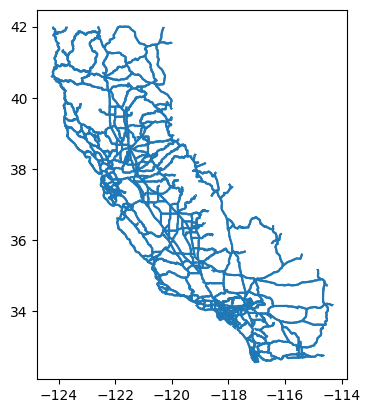

In [4]:
highways.plot()

### Routes

In [5]:
routes = catalog.ca_transit_routes.read()
routes[routes.route_type== '0'].head(2)

,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry
1271,rechaapWbeffO33OX,City and County of San Francisco,F,0,7am-10pm daily,19800,57,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...,https://api.511.org/transit/datafeeds?api_key=...,"LINESTRING (-122.41731 37.80723, -122.41727 37..."
1272,rechaapWbeffO33OX,City and County of San Francisco,F,0,7am-10pm daily,19809,14,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZW...,https://api.511.org/transit/datafeeds?api_key=...,"LINESTRING (-122.41727 37.80707, -122.41562 37..."


#### Selecting Rail Routes Only
 - 0 - Tram, Streetcar, Light rail. Any light rail or street level system within a metropolitan area
 - 1 - Subway, Metro. Any underground rail system within a metropolitan area
 - 2 - Rail. Used for intercity or long-distance travel

In [6]:
rail_group = ['0', '1', '2']
rail_routes = routes[routes.route_type.isin(rail_group)
                    ].reset_index(drop=True)
rail_routes.head(2)

,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry
0,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,36921,2,Empire Service,245,6,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.74115 42.64103, -73.74159 42.6..."
1,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,36921,2,Empire Service,248,6,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.99446 40.75033, -74.00083 40.7..."


### Stops

In [7]:
stops = catalog.ca_transit_stops.read()
stops.head(2)

,org_id,agency,route_id,route_type,stop_id,stop_name,base64_url,uri,geometry
0,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619798,Chapel Ave & Bay St,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12232 34.09485)
1,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619799,Chapel Ave & Main St,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12338 34.09636)


<AxesSubplot:>

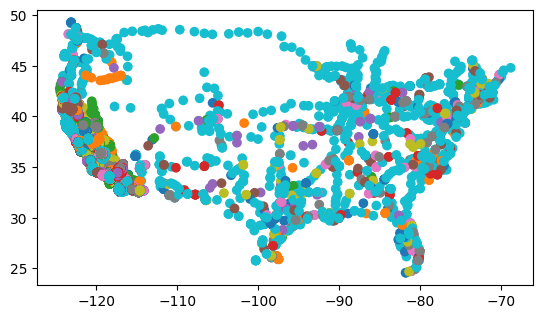

In [8]:
stops.plot('stop_id') #checking stops plot

### Function to check different characterstics of Geospatial data 

In [9]:
def gdf_check(gdf):(
    print(f'Dataframe type is = {type(gdf)}'),
    print(f'GDF shape is = {gdf.shape}'),
    print(f'Active geometry col name is = {gdf.geometry.name}'),
    display(gdf.head()),
    display(gdf.plot()),
    display(gdf.crs)
    )

#### Finding Rail Stops only

In [10]:
rail_stops = stops[stops.route_type.isin(rail_group)
                  ].reset_index(drop=True)

<AxesSubplot:>

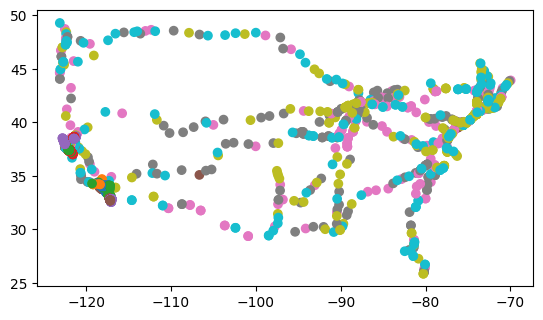

In [11]:
rail_stops.plot('stop_id')

#### Dissolving California Districts to get one large California Map

<AxesSubplot:>

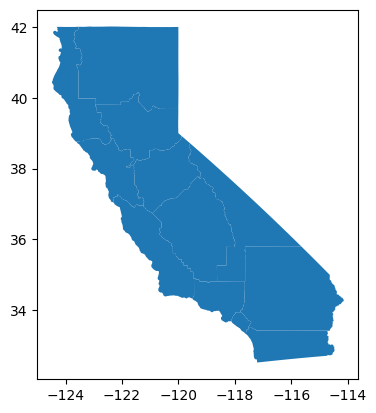

In [12]:
districts.plot() # Plotting Caltrans Districts Map

In [13]:
ca = districts[['geometry', 'Shape__Area', 'Shape__Length']].to_crs('EPSG:2229').dissolve()

#### Finding Stops and Rail Routes within California 

#### Spatial Join for Rail Stops

In [14]:
railstops_ca = gpd.sjoin(rail_stops.to_crs("EPSG:2229"),
    ca.to_crs("EPSG:2229"),
    how = "inner",
    predicate = "intersects"
)

<AxesSubplot:>

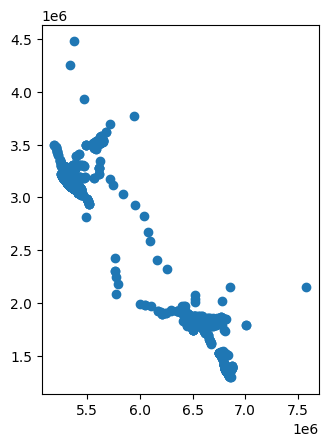

In [15]:
railstops_ca.plot()

#### Clipping for Rail Routes

In [16]:
ca_rail = rail_routes.to_crs('EPSG:2229').clip(ca)

In [17]:
rail_routes.head(2)

,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry
0,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,36921,2,Empire Service,245,6,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.74115 42.64103, -73.74159 42.6..."
1,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,36921,2,Empire Service,248,6,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.99446 40.75033, -74.00083 40.7..."


#### Projecting and Dissolving for Highway Routes

In [18]:
highways = highways.to_crs('EPSG:2229')

In [19]:
highways = highways.dissolve(by='Route').reset_index()


Dataframe type is = <class 'geopandas.geodataframe.GeoDataFrame'>
GDF shape is = (242, 6)
Active geometry col name is = geometry


,Route,geometry,County,District,RouteType,Direction
0,1,"MULTILINESTRING ((6518147.781 1746024.206, 651...",LA,7,State,NB
1,2,"MULTILINESTRING ((6490992.937 1865622.285, 649...",LA,7,State,EB
2,3,"MULTILINESTRING ((5275615.149 4654447.197, 527...",SIS,2,State,NB
3,4,"MULTILINESTRING ((5983573.255 3460229.889, 598...",ALP,10,State,EB
4,5,"MULTILINESTRING ((5405204.172 3674443.942, 540...",COL,3,Interstate,NB


<AxesSubplot:>

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

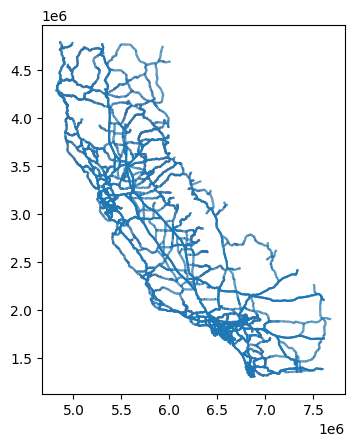

In [20]:
gdf_check(highways)

### Creating Railway Buffer

#### Buffering 0.25 miles near railway routes

Dataframe type is = <class 'geopandas.geodataframe.GeoDataFrame'>
GDF shape is = (51, 11)
Active geometry col name is = geom_buff


,route_id,geom_buff,org_id,agency,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry
0,36930,"POLYGON ((7208303.849 1636404.080, 7208188.951...",recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Sunset Limited,269,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((7602807.693 1377257.623, 760..."
1,398,"POLYGON ((6754757.919 1526704.211, 6755220.959...",recRBcrX4ZvTyvSnm,North County Transit District,2,COASTER,3980014,15,aHR0cHM6Ly93d3cuZ29uY3RkLmNvbS9nb29nbGVfdHJhbn...,https://www.gonctd.com/google_transit.zip,"LINESTRING (6752456.581 1527639.188, 6752915.6..."
2,399,"POLYGON ((6754762.820 1527378.723, 6754796.212...",recRBcrX4ZvTyvSnm,North County Transit District,0,SPRINTER,3990012,34,aHR0cHM6Ly93d3cuZ29uY3RkLmNvbS9nb29nbGVfdHJhbn...,https://www.gonctd.com/google_transit.zip,"LINESTRING (6839727.889 1502790.802, 6839717.1..."
3,507,"POLYGON ((5558965.342 3505259.128, 5558958.407...",rec43oyrfhtPDdRHj,City of Rancho Cordova,0,Downtown - Folsom,46380,26,aHR0cHM6Ly9pcG9ydGFsLnNhY3J0LmNvbS9HVEZTL1NSVE...,https://iportal.sacrt.com/GTFS/SRTD/google_tra...,"MULTILINESTRING ((5626117.107 3515594.727, 562..."
4,51,"POLYGON ((6489445.068 1844204.366, 6490021.030...",recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Southwest Chief,118,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (6489947.165 1842910.544, 6490209.2..."


<AxesSubplot:>

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

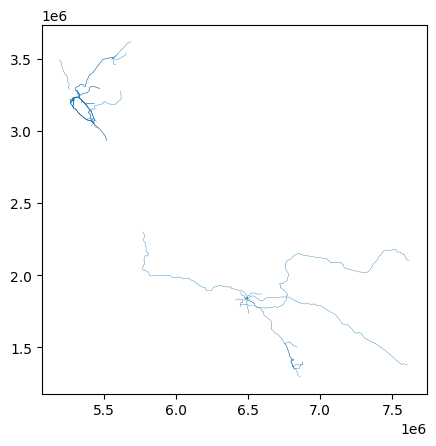

In [21]:
rail_buffer = ca_rail.assign(geom_buff = ca_rail.geometry.buffer(1320)).set_geometry('geom_buff').dissolve(by='route_id').reset_index()
gdf_check(rail_buffer)

#### Creating Geometry Length Column

### Creating Overlay

In [22]:
rail_buffer = rail_buffer.assign(rail_length = rail_buffer.geometry.length)
rail_buffer = rail_buffer.assign(half_rail_length = (rail_buffer.geometry.length/2))

In [23]:
rail_highwayoverlay = gpd.overlay(highways, rail_buffer, how='intersection', keep_geom_type=False)

Dataframe type is = <class 'geopandas.geodataframe.GeoDataFrame'>
GDF shape is = (432, 17)
Active geometry col name is = geometry


,Route,County,District,RouteType,Direction,route_id,org_id,agency,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry,rail_length,half_rail_length
0,1,LA,7,State,NB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6661196.635 1627312.440, 666...",3.688820e+06,1.844410e+06
1,2,LA,7,State,EB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6486246.110 1862321.877, 648...",3.688820e+06,1.844410e+06
2,5,COL,3,Interstate,NB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6480819.205 1874346.221, 648...",3.688820e+06,1.844410e+06
3,8,IMP,11,State,EB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6806534.199 1371713.094, 680...",3.688820e+06,1.844410e+06
4,10,LA,7,Interstate,EB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6489639.072 1842402.822, 648...",3.688820e+06,1.844410e+06


<AxesSubplot:>

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

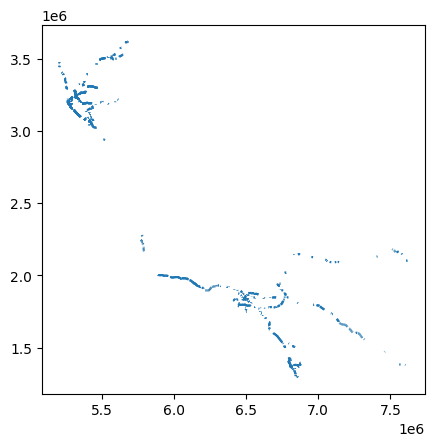

In [24]:
gdf_check(rail_highwayoverlay)

#### Creating Geometry Length Column of Overlay 

In [25]:
rail_highwayoverlay['geom_length'] = rail_highwayoverlay.geometry.length
rail_highwayoverlay.head(2)

,Route,County,District,RouteType,Direction,route_id,org_id,agency,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry,rail_length,half_rail_length,geom_length
0,1,LA,7,State,NB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6661196.635 1627312.440, 666...",3.688820e+06,1.844410e+06,120506.757419
1,2,LA,7,State,EB,78,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,Pacific Surfliner,101,5,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"MULTILINESTRING ((6486246.110 1862321.877, 648...",3.688820e+06,1.844410e+06,5355.672289


In [26]:
overlay_dissolve = rail_highwayoverlay.dissolve(by=['route_id', 'route_name']).reset_index()

In [27]:
overlay_percentage = overlay_dissolve.assign(percent = (overlay_dissolve.geom_length / overlay_dissolve.rail_length)*100)

overlay_percentage.head()

,route_id,route_name,geometry,Route,County,District,RouteType,Direction,org_id,agency,route_type,shape_id,n_trips,base64_url,uri,rail_length,half_rail_length,geom_length,percent
0,36930,Sunset Limited,"MULTILINESTRING ((6496618.037 1844254.138, 649...",5,COL,3,Interstate,NB,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,269,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,2.634938e+06,1.317469e+06,5317.310534,0.201800
1,398,COASTER,"MULTILINESTRING ((6798787.063 1426865.053, 679...",5,COL,3,Interstate,NB,recRBcrX4ZvTyvSnm,North County Transit District,2,3980014,15,aHR0cHM6Ly93d3cuZ29uY3RkLmNvbS9nb29nbGVfdHJhbn...,https://www.gonctd.com/google_transit.zip,4.387197e+05,2.193598e+05,158264.722030,36.074223
2,399,SPRINTER,"MULTILINESTRING ((6757649.538 1527224.791, 675...",5,COL,3,Interstate,NB,recRBcrX4ZvTyvSnm,North County Transit District,0,3990012,34,aHR0cHM6Ly93d3cuZ29uY3RkLmNvbS9nb29nbGVfdHJhbn...,https://www.gonctd.com/google_transit.zip,2.363734e+05,1.181867e+05,5284.295672,2.235571
3,507,Downtown - Folsom,"MULTILINESTRING ((5558074.390 3508899.695, 555...",5,COL,3,Interstate,NB,rec43oyrfhtPDdRHj,City of Rancho Cordova,0,46380,26,aHR0cHM6Ly9pcG9ydGFsLnNhY3J0LmNvbS9HVEZTL1NSVE...,https://iportal.sacrt.com/GTFS/SRTD/google_tra...,2.445130e+05,1.222565e+05,3990.836547,1.632157
4,51,Southwest Chief,"MULTILINESTRING ((6521677.857 1816236.426, 652...",5,COL,3,Interstate,NB,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,118,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,3.479392e+06,1.739696e+06,12000.089516,0.344890


#### Creating function to find the following

- rail routes that are never within 0.25 miles of the SHN
- rail routes with > 0 but less than half of its length near the SHN
- rail routes with at least half of its length near the SHN

In [28]:
def railroutescheck(row):
    if 0 < row.percent < 50:
        return 'less than half of their lengths near highways'
    elif row.percent > 50:
        return 'at least half of this routes length near highways'
    else:
        return 'route never within 0.25 miles from highways'


In [29]:
overlay_percentage['railroutescheck'] = overlay_percentage.apply(railroutescheck, axis=1)

overlay_percentage.head()

,route_id,route_name,geometry,Route,County,District,RouteType,Direction,org_id,agency,route_type,shape_id,n_trips,base64_url,uri,rail_length,half_rail_length,geom_length,percent,railroutescheck
0,36930,Sunset Limited,"MULTILINESTRING ((6496618.037 1844254.138, 649...",5,COL,3,Interstate,NB,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,269,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,2.634938e+06,1.317469e+06,5317.310534,0.201800,less than half of their lengths near highways
1,398,COASTER,"MULTILINESTRING ((6798787.063 1426865.053, 679...",5,COL,3,Interstate,NB,recRBcrX4ZvTyvSnm,North County Transit District,2,3980014,15,aHR0cHM6Ly93d3cuZ29uY3RkLmNvbS9nb29nbGVfdHJhbn...,https://www.gonctd.com/google_transit.zip,4.387197e+05,2.193598e+05,158264.722030,36.074223,less than half of their lengths near highways
2,399,SPRINTER,"MULTILINESTRING ((6757649.538 1527224.791, 675...",5,COL,3,Interstate,NB,recRBcrX4ZvTyvSnm,North County Transit District,0,3990012,34,aHR0cHM6Ly93d3cuZ29uY3RkLmNvbS9nb29nbGVfdHJhbn...,https://www.gonctd.com/google_transit.zip,2.363734e+05,1.181867e+05,5284.295672,2.235571,less than half of their lengths near highways
3,507,Downtown - Folsom,"MULTILINESTRING ((5558074.390 3508899.695, 555...",5,COL,3,Interstate,NB,rec43oyrfhtPDdRHj,City of Rancho Cordova,0,46380,26,aHR0cHM6Ly9pcG9ydGFsLnNhY3J0LmNvbS9HVEZTL1NSVE...,https://iportal.sacrt.com/GTFS/SRTD/google_tra...,2.445130e+05,1.222565e+05,3990.836547,1.632157,less than half of their lengths near highways
4,51,Southwest Chief,"MULTILINESTRING ((6521677.857 1816236.426, 652...",5,COL,3,Interstate,NB,recvUlrKS1N2mvAwk,San Joaquin Joint Powers Authority,2,118,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,3.479392e+06,1.739696e+06,12000.089516,0.344890,less than half of their lengths near highways


In [30]:
overlay_percentage.railroutescheck.value_counts()

less than half of their lengths near highways        48
at least half of this routes length near highways     2
Name: railroutescheck, dtype: int64

#### Grouping by Districts 

In [31]:
overlay_percentage.groupby(['railroutescheck']).District.value_counts()

railroutescheck                                    District
at least half of this routes length near highways  3            1
                                                   7            1
less than half of their lengths near highways      7           18
                                                   4           13
                                                   3           11
                                                   1            5
                                                   10           1
Name: District, dtype: int64